In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./train.csv')

How many men and women are there?

Men: 577
Women: 314


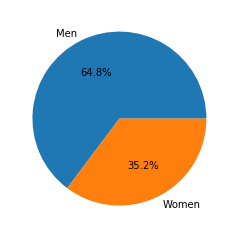

In [2]:
men = data[data.Sex == 'male']['PassengerId'].count()
women = data[data.Sex == 'female']['PassengerId'].count()

print('Men:', men)
print('Women:', women)

fig1, ax1 = plt.subplots()
ax1.pie([men, women], labels=['Men', 'Women'], autopct='%1.1f%%')
plt.show()

How many passengers are there in each class?

First 216
Second 184
Third 184


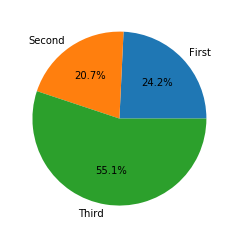

In [3]:
first = data[data.Pclass == 1]['PassengerId'].count()
second = data[data.Pclass == 2]['PassengerId'].count()
third = data[data.Pclass == 3]['PassengerId'].count()

labels = ['First', 'Second', 'Third']

print(labels[0], first)
print(labels[1], second)
print(labels[2], second)

fig1, ax1 = plt.subplots()
ax1.pie([first, second, third], labels=labels, autopct='%1.1f%%')
plt.show()

What is the average age of men depending on passenger class?
What is the average age of women depending on passenger class?

Average age of men from 1st class 41
Average age of men from 2st class 30
Average age of men from 3st class 26
Average age of women from 1st class 34
Average age of women from 2st class 28
Average age of women from 3st class 21


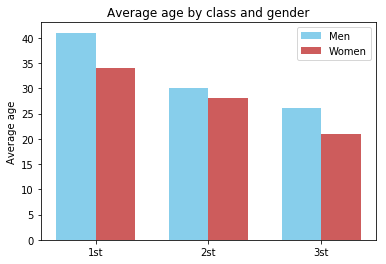

In [4]:
men = data[data.Sex == 'male']
first_men_avg = int(men[men.Pclass == 1]['Age'].mean())
second_men_avg = int(men[men.Pclass == 2]['Age'].mean())
third_men_avg = int(men[men.Pclass == 3]['Age'].mean())

women = data[data.Sex == 'female']
first_women_avg = int(women[women.Pclass == 1]['Age'].mean())
second_women_avg = int(women[women.Pclass == 2]['Age'].mean())
third_women_avg = int(women[women.Pclass == 3]['Age'].mean())

print("Average age of men from 1st class", first_men_avg)
print("Average age of men from 2st class", second_men_avg)
print("Average age of men from 3st class", third_men_avg)

print("Average age of women from 1st class", first_women_avg)
print("Average age of women from 2st class", second_women_avg)
print("Average age of women from 3st class", third_women_avg)

fig, ax = plt.subplots()
men_means = [first_men_avg, second_men_avg, third_men_avg]
women_means = [first_women_avg, second_women_avg, third_women_avg]
ind = np.arange(len(men_means))
width = 0.35
rects1 = ax.bar(ind - width/2, men_means, width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width,
                color='IndianRed', label='Women')

ax.set_ylabel('Average age')
ax.set_title('Average age by class and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('1st', '2st', '3st'))
ax.legend()

plt.show()

What is the fraction of passengers who survived?

Survived: 342
Lost: 549


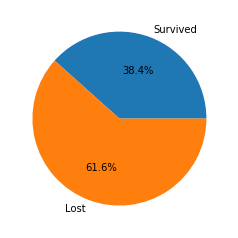

In [5]:
survived = data[data.Survived == 1]['PassengerId'].count()
lost = data[data.Survived == 0]['PassengerId'].count()

print('Survived:', survived)
print('Lost:', lost)

fig1, ax1 = plt.subplots()
ax1.pie([survived, lost], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.show()

Is it true that young passengers survived more often?

True, young passengers survived more often


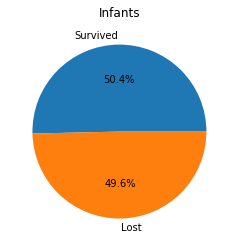

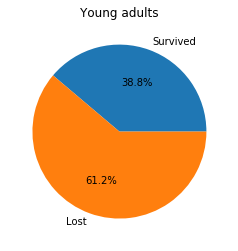

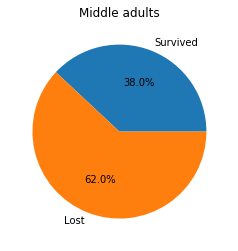

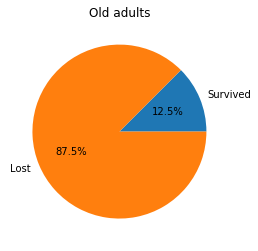

In [44]:
infants = data[data.Age <= 18]
young_adults = data[(data.Age > 18) & (data.Age <= 40)]
middle_adults = data[(data.Age > 40) & (data.Age <= 65)]
old_adults = data[data.Age > 65]

infants = infants.groupby('Survived')['PassengerId'].count()
young_adults = young_adults.groupby('Survived')['PassengerId'].count()
middle_adults = middle_adults.groupby('Survived')['PassengerId'].count()
old_adults = old_adults.groupby('Survived')['PassengerId'].count()

fig1, ax1 = plt.subplots()
ax1.pie([infants[1], infants[0]], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.title('Infants')

fig2, ax2 = plt.subplots()
ax2.pie([young_adults[1], young_adults[0]], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.title('Young adults')

fig3, ax3 = plt.subplots()
ax3.pie([middle_adults[1], middle_adults[0]], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.title('Middle adults')

fig4, ax4 = plt.subplots()
ax4.pie([old_adults[1], old_adults[0]], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.title('Old adults')

sr_infants = infants[1] / sum(infants)

sr_young_adults = young_adults[1] / sum(young_adults)

sr_middle_adults = middle_adults[1] / sum(middle_adults)

sr_old_adults = old_adults[1] / sum(old_adults)

most_survived = np.array([sr_infants, sr_young_adults, sr_middle_adults, sr_old_adults]).argmax()

if most_survived == 0:
    print("True, young passengers survived more often")
else:
    print("False, young passengers didn't survive more often")

plt.show()

Is it true that women survived more often than men?

Survived men: 109
Lost men: 468
Survived women: 233
Lost women: 81
True, women survived more then men


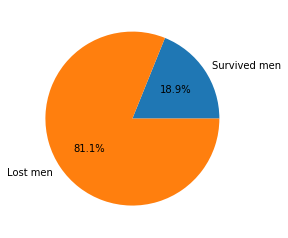

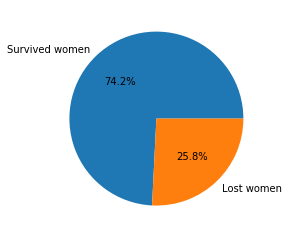

In [7]:
men = data[data.Sex == 'male']
women = data[data.Sex == 'female']

survived_men = men.groupby('Survived')['PassengerId'].count()

survived_women = women.groupby('Survived')['PassengerId'].count()

print('Survived men:', survived_men[1])
print('Lost men:', survived_men[0])

print('Survived women:', survived_women[1])
print('Lost women:', survived_women[0])

survived_ratio_men = survived_men[1] / men['PassengerId'].count()
survived_ratio_women = survived_women[1] / women['PassengerId'].count()

if survived_ratio_men > survived_ratio_women:
    print('False, men survived more then women')
else:
    print('True, women survived more then men')

fig1, ax1 = plt.subplots()
ax1.pie([survived_men[1], survived_men[0]], labels=['Survived men', 'Lost men'], autopct='%1.1f%%')

fig2, ax2 = plt.subplots()
ax2.pie([survived_women[1], survived_women[0]], labels=['Survived women', 'Lost women'], autopct='%1.1f%%')

plt.show()

What is the average ticket price?

In [8]:
fare = data.Fare
print(f'Average ticket price: {np.average(fare).round(2)}')

Average ticket price: 32.2


What is the mean and standard deviation of ticket price?

Mean of ticket price: 32.204207968574636
Standard deviation of ticket price: 49.6934285971809


/home/alex/pyproj/python-labs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


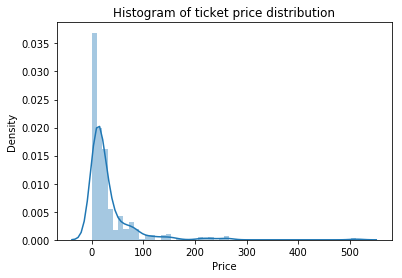

In [9]:
import seaborn as sns

print(f'Mean of ticket price: {fare.mean()}')
print(f'Standard deviation of ticket price: {fare.std()}')

sns.distplot(fare)
plt.title('Histogram of ticket price distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

Is it true that passengers with expensive tickets survived more often? Why?

False, passengers with most expensive tickets didn't survive more often


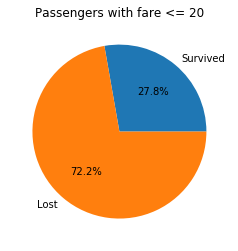

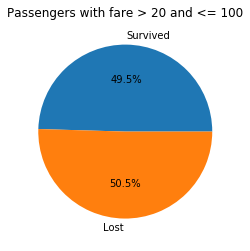

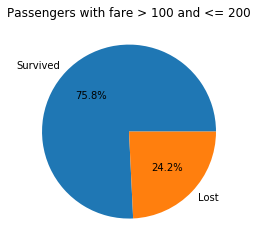

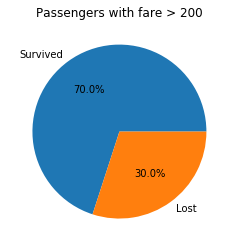

In [42]:
a_fare = data[data.Fare <= 20]
b_fare = data[(data.Fare > 20) & (data.Fare <= 100)]
c_fare = data[(data.Fare > 100) & (data.Fare <= 200)]
d_fare = data[data.Fare > 200]

a_pass = a_fare.groupby('Survived')['PassengerId'].count()
b_pass = b_fare.groupby('Survived')['PassengerId'].count()
c_pass = c_fare.groupby('Survived')['PassengerId'].count()
d_pass = d_fare.groupby('Survived')['PassengerId'].count()

fig1, ax1 = plt.subplots()
ax1.pie([a_pass[1], a_pass[0]], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.title('Passengers with fare <= 20')

fig2, ax2 = plt.subplots()
ax2.pie([b_pass[1], b_pass[0]], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.title('Passengers with fare > 20 and <= 100')

fig3, ax3 = plt.subplots()
ax3.pie([c_pass[1], c_pass[0]], labels=['Survived', 'Lost'], autopct='%1.1f%%')
plt.title('Passengers with fare > 100 and <= 200')

fig4, ax4 = plt.subplots()
ax4.pie([d_pass[1], d_pass[0]], labels=['Survived', 'Lost '], autopct='%1.1f%%')
plt.title('Passengers with fare > 200')

sr_a_pass = a_pass[1] / sum(a_pass)

sr_b_pass = b_pass[1] / sum(b_pass)

sr_c_pass = c_pass[1] / sum(c_pass)

sr_d_pass = d_pass[1] / sum(d_pass)

most_survived_by_fare = np.array([sr_a_pass, sr_b_pass, sr_c_pass, sr_d_pass]).argmax()

if most_survived_by_fare == 4:
    print("True, passengers with most expensive tickets survived more often")
else:
    print("False, passengers with most expensive tickets didn't survive more often")

plt.show()

What is the most popular male name among Titanic passengers?

In [10]:
men_names = []
for name in data[data.Sex == 'male'].Name:
    men_names.append(name.split()[2])

In [11]:
def most_common(lst):
    return max(set(lst), key=lst.count)

most_common(men_names)

'William'